In [40]:
# 📘 Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📦 All Required Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score


from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, auc, precision_score, recall_score, f1_score,
    ConfusionMatrixDisplay
)

import pickle
import warnings
warnings.filterwarnings("ignore")

# For interactive plots
%matplotlib inline

print("✅ Libraries imported successfully")


✅ Libraries imported successfully


In [41]:
# 📘 Step 2: Load the dataset
df = pd.read_csv('/content/adult 3.csv')  # Update path if necessary
print("✅ Dataset loaded successfully")

# 📊 Step 2.1: Display basic info
print("Dataset shape:", df.shape)
df.info()

# 📊 Step 2.2: Show first few rows
df.head()


✅ Dataset loaded successfully
Dataset shape: (48842, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [45]:
# Step 3: Handle missing values and encode categorical columns

# Replace '?' with NaN and drop rows with NaN
df.replace(' ?', np.nan, inplace=True)
df.dropna(inplace=True)

# Strip whitespaces from object columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("✅ Cleaned and encoded dataset:")
df.head()



✅ Cleaned and encoded dataset:


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39,0


In [46]:
#  Step 4: Define features and target
X = df.drop('income', axis=1)  # Features
y = df['income']               # Target: 0 (<=50K), 1 (>50K)

#  Step 4.1: Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ⚖️ Step 4.2: Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Data split and scaled successfully")


✅ Data split and scaled successfully


In [47]:
# 📦 Install LightGBM (only once in Colab)
!pip install lightgbm --quiet


In [48]:
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Add all models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'LightGBM': LGBMClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier()
}

# Train & evaluate all models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f'✅ {name} Accuracy: {acc:.4f}')


✅ Logistic Regression Accuracy: 0.8272
✅ Random Forest Accuracy: 0.8650
✅ SVM Accuracy: 0.8555
✅ KNN Accuracy: 0.8334
✅ XGBoost Accuracy: 0.8759
✅ Decision Tree Accuracy: 0.8166
✅ Gradient Boosting Accuracy: 0.8736
[LightGBM] [Info] Number of positive: 9397, number of negative: 29676
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003378 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 713
[LightGBM] [Info] Number of data points in the train set: 39073, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240499 -> initscore=-1.149948
[LightGBM] [Info] Start training from score -1.149948
✅ LightGBM Accuracy: 0.8790
✅ Naive Bayes Accuracy: 0.8069
✅ AdaBoost Accuracy: 0.8536


<Figure size 800x650 with 0 Axes>

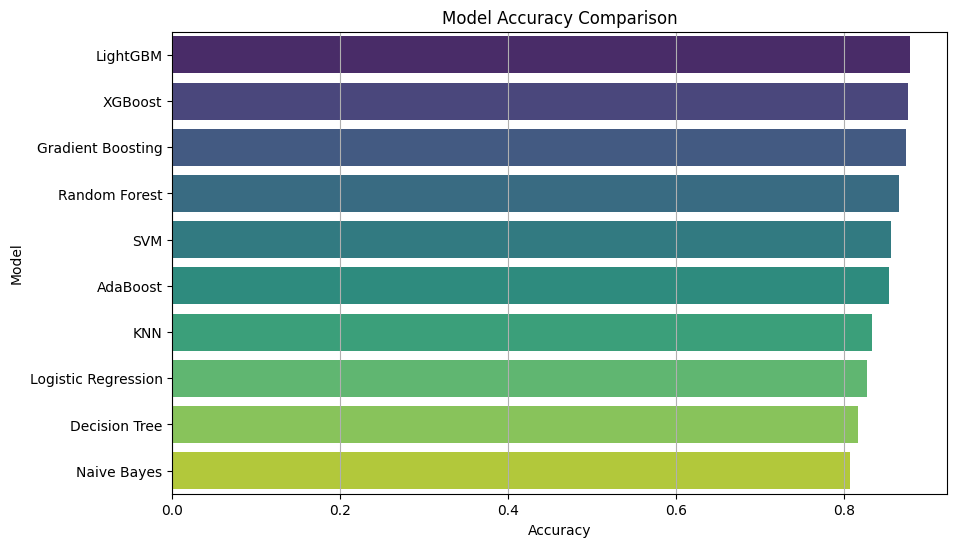

In [49]:
#  Accuracy Bar Chart
import matplotlib.pyplot as plt
import seaborn as sns

# Sort results
sorted_results = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=list(sorted_results.values()), y=list(sorted_results.keys()), palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.grid(axis='x')
plt.show()


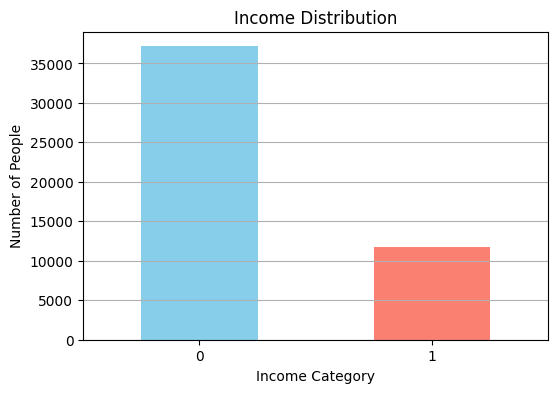

In [50]:
import matplotlib.pyplot as plt

# Assuming your dataframe is called `df`
income_counts = df['income'].value_counts()

plt.figure(figsize=(6, 4))
income_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Income Distribution')
plt.xlabel('Income Category')
plt.ylabel('Number of People')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


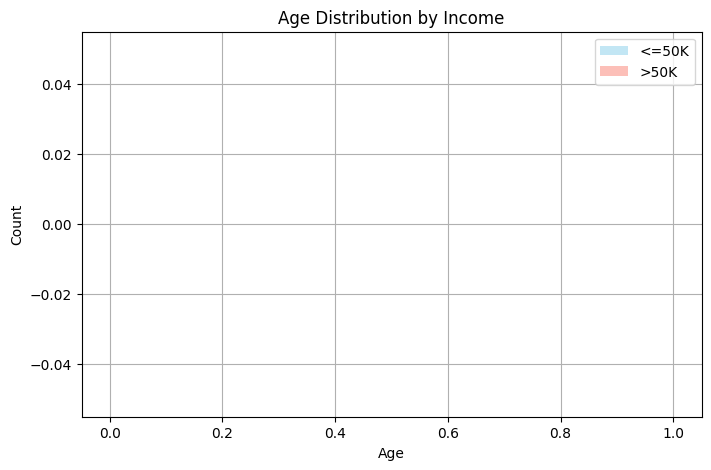

In [51]:
plt.figure(figsize=(8, 5))
for label, color in zip(['<=50K', '>50K'], ['skyblue', 'salmon']):
    subset = df[df['income'] == label]
    plt.hist(subset['age'], bins=30, alpha=0.5, label=label, color=color)

plt.title('Age Distribution by Income')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


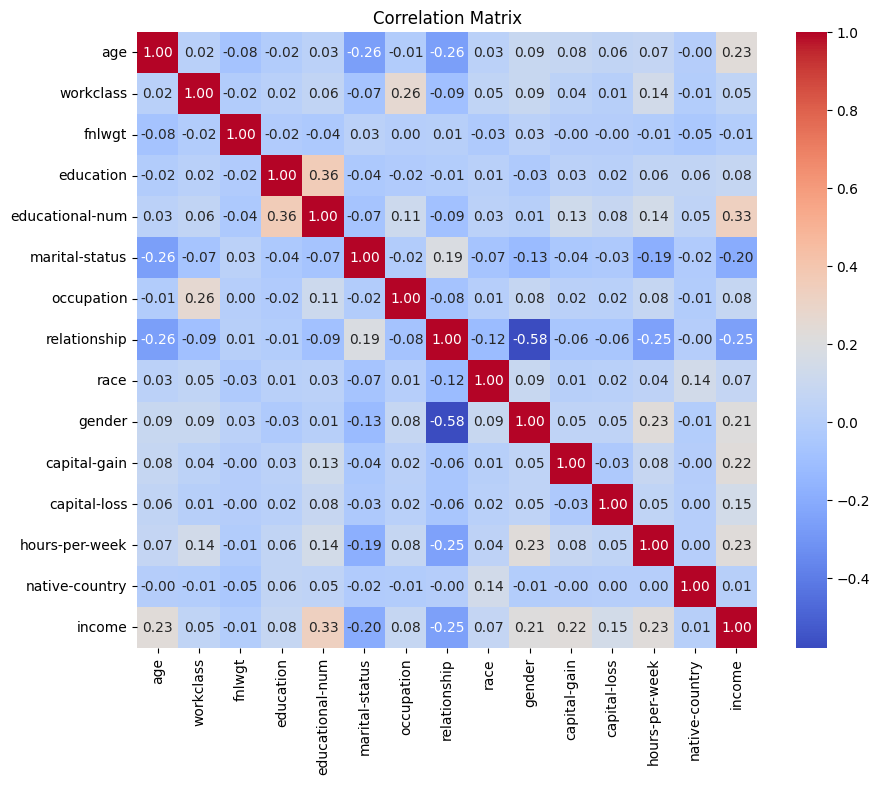

In [52]:
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include='number').corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


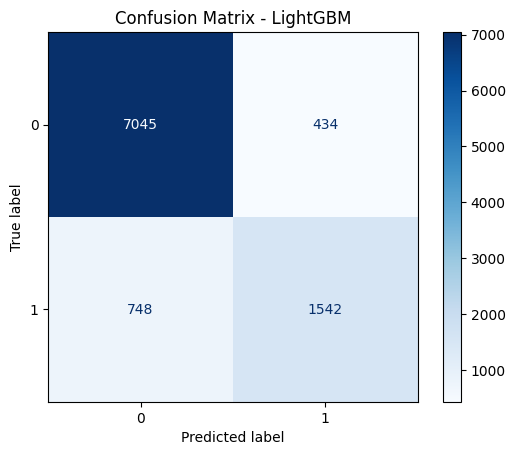

📄 Classification Report for LightGBM:

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7479
           1       0.78      0.67      0.72      2290

    accuracy                           0.88      9769
   macro avg       0.84      0.81      0.82      9769
weighted avg       0.88      0.88      0.88      9769



In [53]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Choose the best model (highest accuracy)
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

# Predict and evaluate
y_pred = best_model.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.grid(False)
plt.show()

# Classification Report
print(f"📄 Classification Report for {best_model_name}:\n")
print(classification_report(y_test, y_pred))


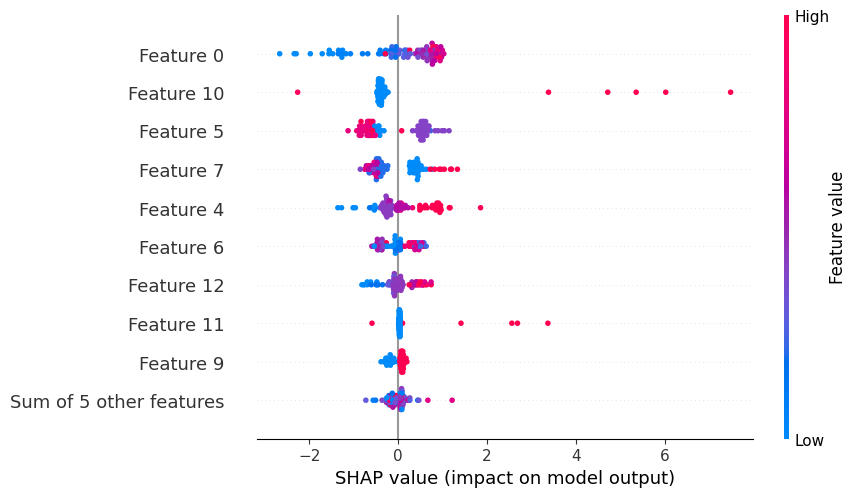

In [54]:
import shap

# Only for tree-based models (e.g., XGBoost, RF, LightGBM)
explainer = shap.Explainer(best_model, X_train_scaled)
shap_values = explainer(X_test_scaled[:100])

# Summary plot
shap.plots.beeswarm(shap_values, max_display=10)


In [118]:
import joblib
joblib.dump(best_model, 'best_salary_model.pkl')
joblib.dump(scaler, 'scaler.pkl')




['scaler.pkl']

In [119]:
# Save feature column names
joblib.dump(X.columns.tolist(), 'feature_columns.pkl')


['feature_columns.pkl']

In [120]:
!pip install streamlit
!pip install pyngrok
!pip install shap


In [121]:

import joblib

#  Correct file names
model = joblib.load("best_salary_model.pkl")
scaler = joblib.load("scaler.pkl")

print("✅ Model and Scaler loaded successfully!")



✅ Model and Scaler loaded successfully!


In [114]:
#30ErYAHDJAXMA0u9EP1taR8ko1B_g1KrrBZXmTxs1JEdeAYU
from pyngrok import conf, ngrok

# Paste your token below
conf.get_default().auth_token = "30ErYAHDJAXMA0u9EP1taR8ko1B_g1KrrBZXmTxs1JEdeAYU"


In [101]:
!pip install streamlit pyngrok scikit-learn matplotlib pandas


In [122]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from pyngrok import ngrok


In [129]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
import matplotlib.pyplot as plt

# Load model and scaler
model = joblib.load("best_salary_model.pkl")
scaler = joblib.load("scaler.pkl")

st.set_page_config(layout="wide", page_title="Employee Salary Predictor", page_icon="💼")

# Apply custom CSS if uploaded
css_file = st.file_uploader("Upload Custom CSS (Optional)", type="css")
if css_file:
    st.markdown(f"<style>{css_file.read().decode()}</style>", unsafe_allow_html=True)
else:
    # Default styling
    st.markdown("""
        <style>
        .main {background-color: #0d1117; color: white;}
        .block-container {border: 2px solid pink; border-radius: 10px; padding: 20px;}
        </style>
    """, unsafe_allow_html=True)

# Header
st.title("💼 Employee Salary Prediction App")

# Tabs for Personal and Batch
tab1, tab2 = st.tabs(["🔎 Single Person", "📂 Batch Prediction"])

with tab1:
    st.subheader("Predict Salary for One Person")

    # Fewer inputs (simplified)
    age = st.slider("Age", 18, 70, 30)
    education = st.selectbox("Education", ['HS-grad', 'Bachelors', 'Masters', 'Doctorate'])
    occupation = st.selectbox("Occupation", ['Tech-support', 'Craft-repair', 'Sales', 'Exec-managerial', 'Other-service'])
    hours_per_week = st.slider("Hours per Week", 1, 100, 40)
    sex = st.radio("Gender", ['Male', 'Female'])

    # Convert to DataFrame
    user_data = pd.DataFrame({
        'age': [age],
        'education': [education],
        'occupation': [occupation],
        'hours-per-week': [hours_per_week],
        'sex': [sex]
    })

    # Encode categorical fields
    user_data = pd.get_dummies(user_data)

    # Align with training data
    training_cols = model.feature_names_in_
    for col in training_cols:
        if col not in user_data.columns:
            user_data[col] = 0
    user_data = user_data[training_cols]

    # Scale & Predict
    scaled = scaler.transform(user_data)
    prediction = model.predict(scaled)[0]
    result = ">50K" if prediction == 1 else "<=50K"
    st.success(f"💰 Predicted Salary: {result}")

with tab2:
    st.subheader("Batch Prediction from CSV")
    uploaded_file = st.file_uploader("Upload CSV File", type="csv")

    if uploaded_file:
        df = pd.read_csv(uploaded_file)
        original_cols = df.columns.tolist()

        # Preprocessing: Dummy encode and align
        df_encoded = pd.get_dummies(df)
        for col in model.feature_names_in_:
            if col not in df_encoded.columns:
                df_encoded[col] = 0
        df_encoded = df_encoded[model.feature_names_in_]

        # Scale
        scaled_batch = scaler.transform(df_encoded)
        predictions = model.predict(scaled_batch)

        df['Prediction'] = ['>50K' if pred == 1 else '<=50K' for pred in predictions]
        st.write("📋 Prediction Results", df)

        # Count predictions
        count_high = (df['Prediction'] == '>50K').sum()
        count_low = (df['Prediction'] == '<=50K').sum()

        # Bar Plot
        fig, ax = plt.subplots()
        ax.bar(['<=50K', '>50K'], [count_low, count_high], color=['skyblue', 'lightgreen'])
        ax.set_title("Salary Prediction Count")
        st.pyplot(fig)

        # Downloadable result
        csv = df.to_csv(index=False).encode('utf-8')
        st.download_button("📥 Download Results", csv, file_name="salary_predictions.csv", mime="text/csv")










Overwriting app.py


In [130]:
from pyngrok import ngrok

# Kill all active tunnels
ngrok.kill()


In [131]:
!streamlit run app.py &>/content/log.txt &

# Start ngrok tunnel
from pyngrok import ngrok
public_url = ngrok.connect(8501)
print("🌐 Public URL:", public_url)


🌐 Public URL: NgrokTunnel: "https://2653a4d62e9c.ngrok-free.app" -> "http://localhost:8501"
